# Inspecting centralized optimization for f_global - gradient descent vs PI

- f_global as objective function to minimize 
- only 1 agent
- optimization algortihm = gradient descent

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma


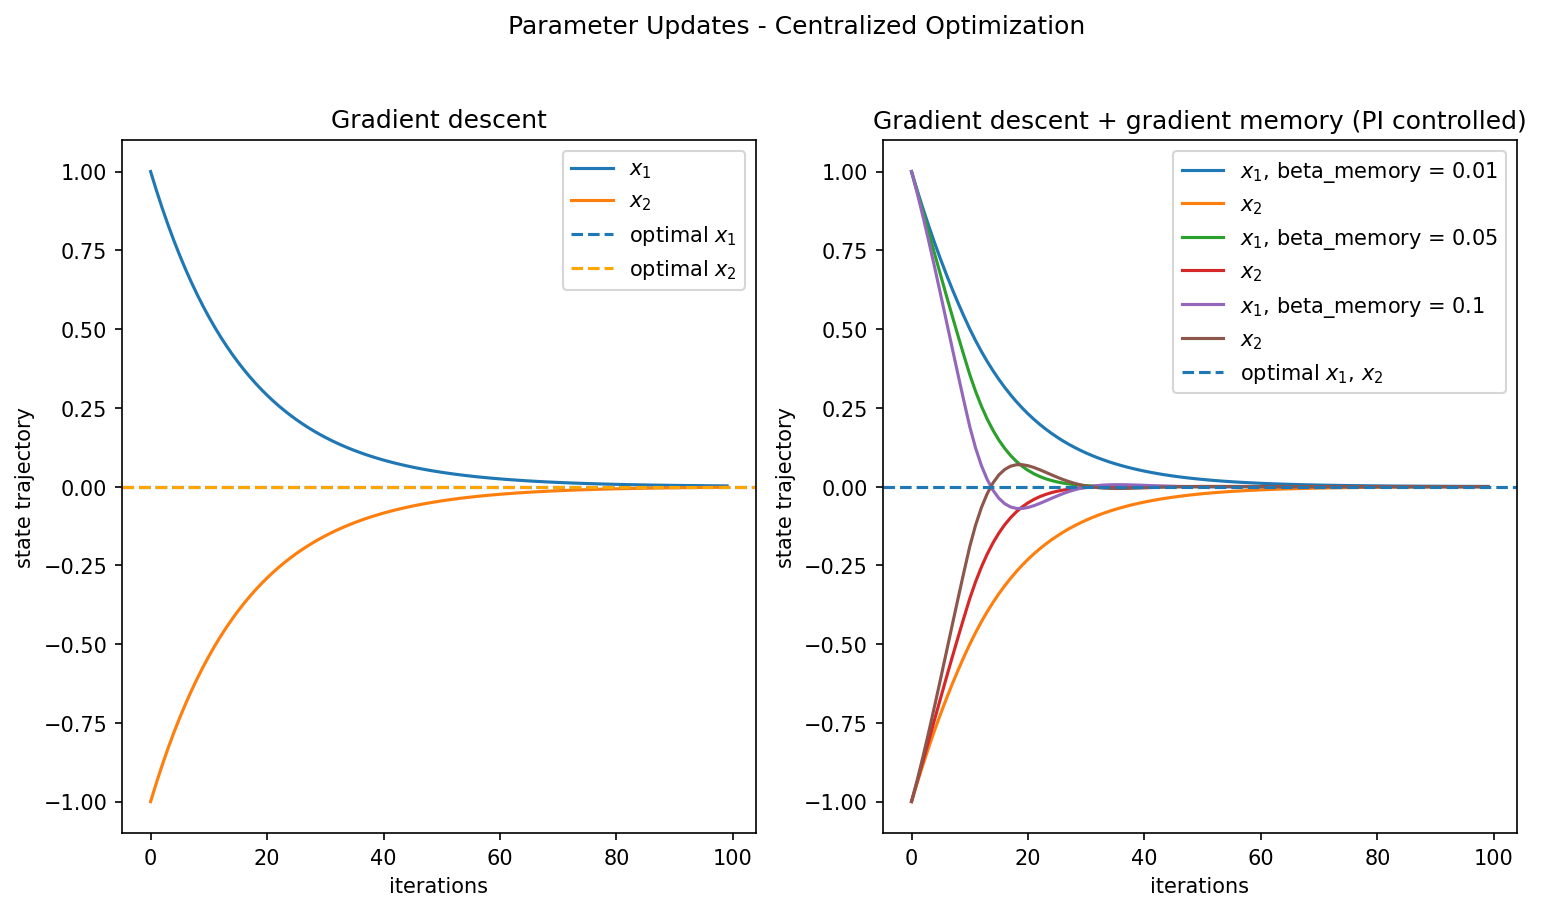

In [16]:
import matplotlib.pyplot as plt

def gradient_vector_f_global_Autograd(x):
    import jax

    x1, x2 = x[0], x[1]

    f_partial_x1 = jax.grad(f_global, argnums=0)
    f_partial_x2 = jax.grad(f_global, argnums=1)

    return f_partial_x1(x1, x2), f_partial_x2(x1, x2)

def f_global(x1, x2):
    return 0.05 * x1**2 + 0.05 * x2**2

optimal_x_1 = 0
optimal_x_2 = 0

n_iterations = 100

beta = 0.2
alpha = 3

learning_rate = beta * alpha

x1, x2 = 1., -1.

history_x1 = []
history_x2 = []
for _ in range(n_iterations):
    history_x1.append(x1)
    history_x2.append(x2)

    x1 = x1 - learning_rate * gradient_vector_f_global_Autograd([x1, x2])[0]
    x2 = x2 - learning_rate * gradient_vector_f_global_Autograd([x1, x2])[1]

fig, axs = plt.subplots(1, 2, figsize=(12, 6), dpi=150)

# Plot for the first scenario
axs[0].plot(range(len(history_x1)), history_x1, label="$x_1$")
axs[0].plot(range(len(history_x2)), history_x2, label="$x_2$")
axs[0].axhline(y=optimal_x_1, linestyle='dashed', label="optimal $x_1$")
axs[0].axhline(y=optimal_x_2, linestyle='dashed', label="optimal $x_2$", color="orange")
axs[0].set_title("Gradient descent")
axs[0].set_xlabel("iterations")
axs[0].set_ylabel("state trajectory")
axs[0].legend()

# Plot for the second scenario


betas_memory = [0.01, 0.05, 0.1]

for beta_memory in betas_memory:
    x1, x2 = 1., -1.
    history_x1 = []
    history_x2 = []
    # beta_memory = 0.1
    len_memory = 10
    gradient_memory_x1 = len_memory * [0]
    gradient_memory_x2 = len_memory * [0]

    for _ in range(n_iterations):
        history_x1.append(x1)
        history_x2.append(x2)

        gradient_memory_x1[:-1], gradient_memory_x2[:-1] = gradient_memory_x1[1:], gradient_memory_x2[1:]
        gradient_memory_x1[-1] = float(gradient_vector_f_global_Autograd([x1, x2])[0])
        gradient_memory_x2[-1] = float(gradient_vector_f_global_Autograd([x1, x2])[1])

        x1 = x1 - learning_rate * gradient_vector_f_global_Autograd([x1, x2])[0] - beta_memory * sum(gradient_memory_x1)
        x2 = x2 - learning_rate * gradient_vector_f_global_Autograd([x1, x2])[1] - beta_memory * sum(gradient_memory_x2)

    axs[1].plot(range(len(history_x1)), history_x1, label=f"$x_1$, beta_memory = {beta_memory}")
    axs[1].plot(range(len(history_x2)), history_x2, label="$x_2$")
axs[1].axhline(y=optimal_x_1, linestyle='dashed', label="optimal $x_1$, $x_2$")

fig.suptitle("Parameter Updates - Centralized Optimization", y=1.02)

axs[1].set_title("Gradient descent + gradient memory (PI controlled)")
axs[1].set_xlabel("iterations")
axs[1].set_ylabel("state trajectory")
axs[1].legend()
plt.show()


# Fractrional shennanigans

eq. (2) in *Discrete-Time Fractional-Order PID Controller* == wikipedia/fractional calculus/Riemann Louiville


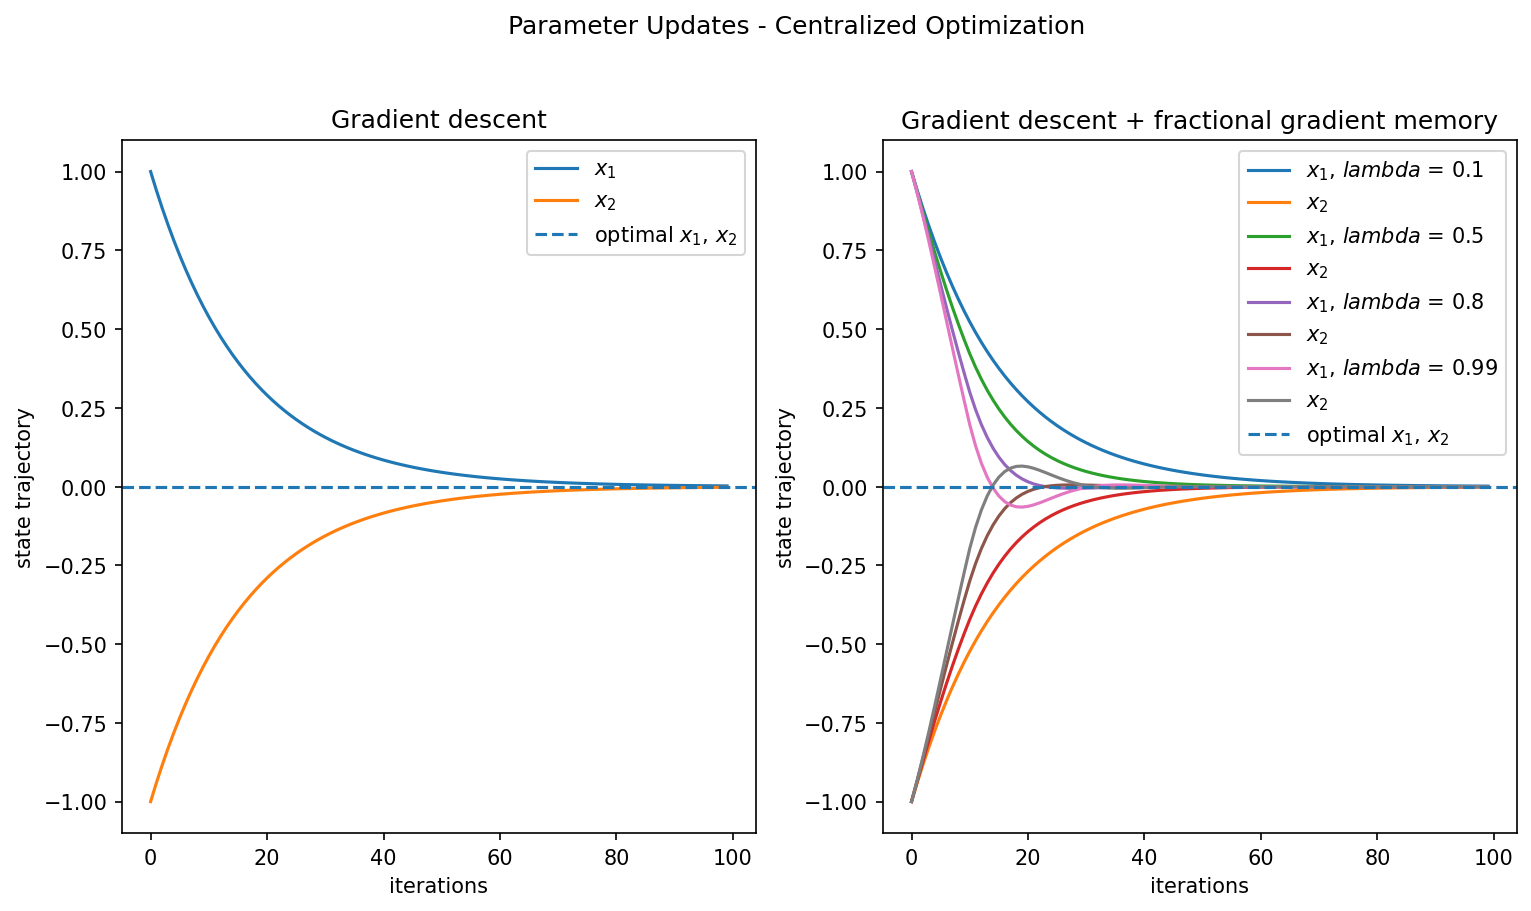

In [21]:
import matplotlib.pyplot as plt
from scipy.special import gamma


_lambdas = [0.1, 0.5, 0.8, 0.99]

def gradient_vector_f_global_Autograd(x):
    import jax

    x1, x2 = x[0], x[1]

    f_partial_x1 = jax.grad(f_global, argnums=0)
    f_partial_x2 = jax.grad(f_global, argnums=1)

    return f_partial_x1(x1, x2), f_partial_x2(x1, x2)

def f_global(x1, x2):
    return 0.05 * x1**2 + 0.05 * x2**2

optimal_x_1 = 0
optimal_x_2 = 0

n_iterations = 100

beta = 0.2
alpha = 3

learning_rate = beta * alpha

x1, x2 = 1., -1.

history_x1 = []
history_x2 = []
for _ in range(n_iterations):
    history_x1.append(x1)
    history_x2.append(x2)

    x1 = x1 - learning_rate * gradient_vector_f_global_Autograd([x1, x2])[0]
    x2 = x2 - learning_rate * gradient_vector_f_global_Autograd([x1, x2])[1]

fig, axs = plt.subplots(1, 2, figsize=(12, 6), dpi=150)

# Plot for the first scenario
axs[0].plot(range(len(history_x1)), history_x1, label="$x_1$")
axs[0].plot(range(len(history_x2)), history_x2, label="$x_2$")
axs[0].axhline(y=optimal_x_1, linestyle='dashed', label="optimal $x_1$, $x_2$")
axs[0].set_title("Gradient descent")
axs[0].set_xlabel("iterations")
axs[0].set_ylabel("state trajectory")
axs[0].legend()

# Plot for the second scenario

for _lambda in _lambdas:
    x1, x2 = 1., -1.

    history_x1 = []
    history_x2 = []
    beta_memory = 0.1
    len_memory = 10
    gradient_memory_x1 = len_memory * [0]
    gradient_memory_x2 = len_memory * [0]
    for _ in range(n_iterations):
        history_x1.append(x1)
        history_x2.append(x2)

        gradient_memory_x1[:-1], gradient_memory_x2[:-1] = gradient_memory_x1[1:], gradient_memory_x2[1:]
        gradient_memory_x1[-1] = float(gradient_vector_f_global_Autograd([x1, x2])[0])
        gradient_memory_x2[-1] = float(gradient_vector_f_global_Autograd([x1, x2])[1])

        # print("gamma function returns: ", gamma(_lambda))

        x1 = x1 - learning_rate * gradient_vector_f_global_Autograd([x1, x2])[0] - beta_memory * ( 1 / gamma(_lambda) ) * sum( [ gradient_memory_x1[n] / ((len_memory-n) ** (1-_lambda)) for n in range(len_memory) ] )
        x2 = x2 - learning_rate * gradient_vector_f_global_Autograd([x1, x2])[1] - beta_memory * ( 1 / gamma(_lambda) ) * sum( [ gradient_memory_x2[n] / ((len_memory-n) ** (1-_lambda)) for n in range(len_memory) ] )

    axs[1].plot(range(len(history_x1)), history_x1, label=f"$x_1$, $lambda$ = {_lambda}")
    axs[1].plot(range(len(history_x2)), history_x2, label="$x_2$")




axs[1].axhline(y=optimal_x_1, linestyle='dashed', label="optimal $x_1$, $x_2$")

fig.suptitle("Parameter Updates - Centralized Optimization", y=1.02)

axs[1].set_title("Gradient descent + fractional gradient memory")
axs[1].set_xlabel("iterations")
axs[1].set_ylabel("state trajectory")
axs[1].legend()
plt.show()


# Frational-infused gradient descent
1) A variant can be using only the fractional memory term in the update
2) Another variant (more interesting) is taking the fractional derivative directly on the objective, with a memory of 10 bins in the past.

## 1)

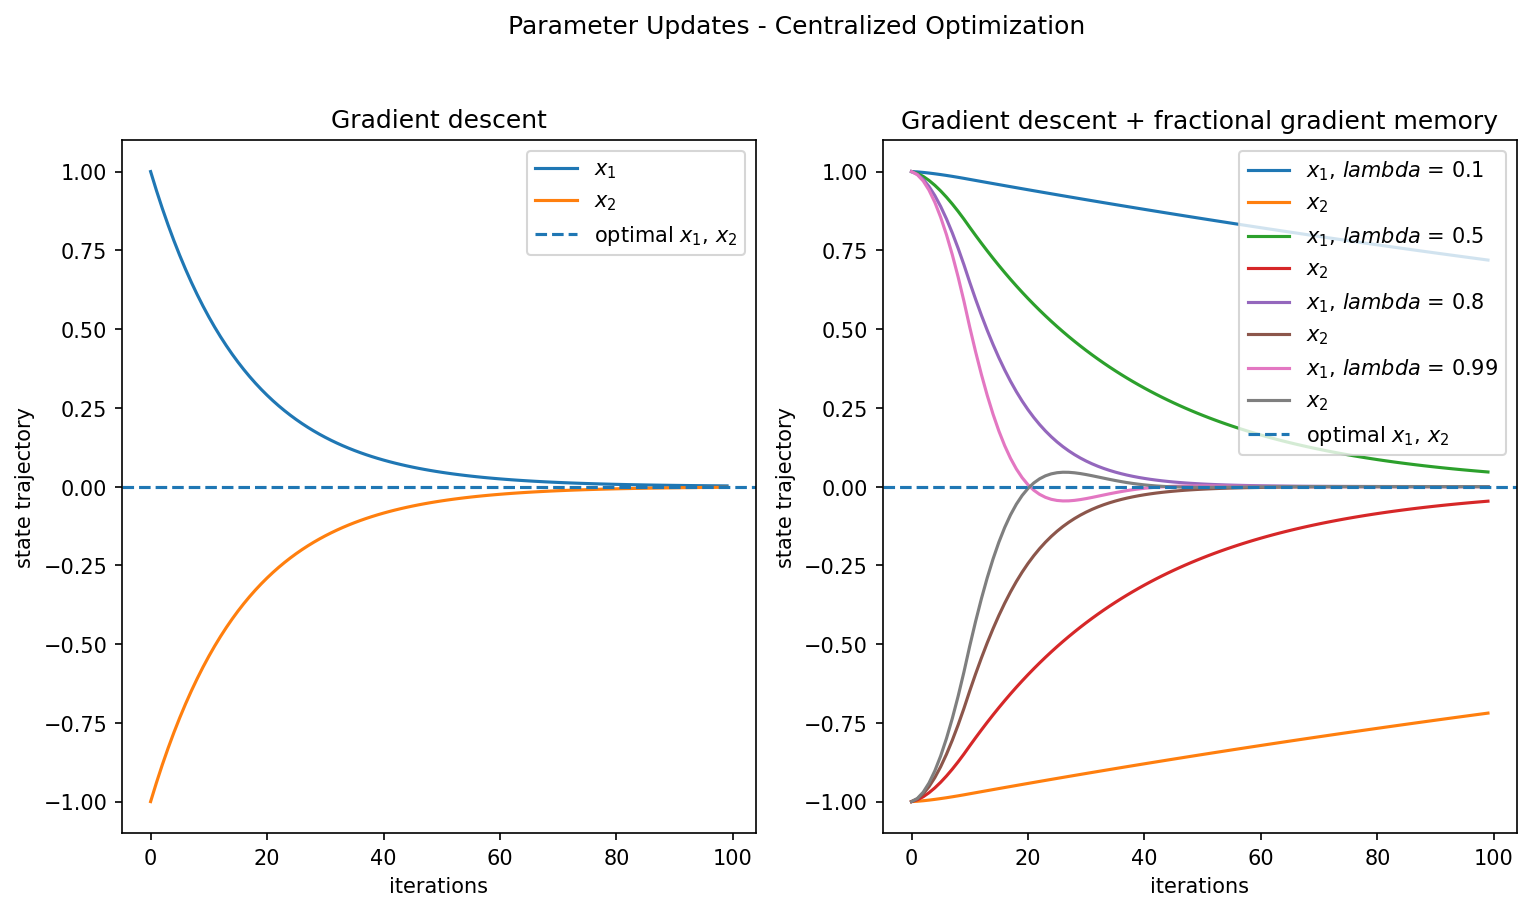

In [17]:
import matplotlib.pyplot as plt
from scipy.special import gamma


_lambdas = [0.1, 0.5, 0.8, 0.99]

def gradient_vector_f_global_Autograd(x):
    import jax

    x1, x2 = x[0], x[1]

    f_partial_x1 = jax.grad(f_global, argnums=0)
    f_partial_x2 = jax.grad(f_global, argnums=1)

    return f_partial_x1(x1, x2), f_partial_x2(x1, x2)

def f_global(x1, x2):
    return 0.05 * x1**2 + 0.05 * x2**2

optimal_x_1 = 0
optimal_x_2 = 0

n_iterations = 100

beta = 0.2
alpha = 3

learning_rate = beta * alpha

x1, x2 = 1., -1.

history_x1 = []
history_x2 = []
for _ in range(n_iterations):
    history_x1.append(x1)
    history_x2.append(x2)

    x1 = x1 - learning_rate * gradient_vector_f_global_Autograd([x1, x2])[0]
    x2 = x2 - learning_rate * gradient_vector_f_global_Autograd([x1, x2])[1]

fig, axs = plt.subplots(1, 2, figsize=(12, 6), dpi=150)

# Plot for the first scenario
axs[0].plot(range(len(history_x1)), history_x1, label="$x_1$")
axs[0].plot(range(len(history_x2)), history_x2, label="$x_2$")
axs[0].axhline(y=optimal_x_1, linestyle='dashed', label="optimal $x_1$, $x_2$")
axs[0].set_title("Gradient descent")
axs[0].set_xlabel("iterations")
axs[0].set_ylabel("state trajectory")
axs[0].legend()

# Plot for the second scenario

for _lambda in _lambdas:
    x1, x2 = 1., -1.

    history_x1 = []
    history_x2 = []
    beta_memory = 0.1
    len_memory = 10
    gradient_memory_x1 = len_memory * [0]
    gradient_memory_x2 = len_memory * [0]
    for _ in range(n_iterations):
        history_x1.append(x1)
        history_x2.append(x2)

        gradient_memory_x1[:-1], gradient_memory_x2[:-1] = gradient_memory_x1[1:], gradient_memory_x2[1:]
        gradient_memory_x1[-1] = float(gradient_vector_f_global_Autograd([x1, x2])[0])
        gradient_memory_x2[-1] = float(gradient_vector_f_global_Autograd([x1, x2])[1])

        # print("gamma function returns: ", gamma(_lambda))

        x1 = x1 - beta_memory * ( 1 / gamma(_lambda) ) * sum( [ gradient_memory_x1[n] / ((len_memory-n) ** (1-_lambda)) for n in range(len_memory) ] )
        x2 = x2 - beta_memory * ( 1 / gamma(_lambda) ) * sum( [ gradient_memory_x2[n] / ((len_memory-n) ** (1-_lambda)) for n in range(len_memory) ] )

    axs[1].plot(range(len(history_x1)), history_x1, label=f"$x_1$, $lambda$ = {_lambda}")
    axs[1].plot(range(len(history_x2)), history_x2, label="$x_2$")




axs[1].axhline(y=optimal_x_1, linestyle='dashed', label="optimal $x_1$, $x_2$")

fig.suptitle("Parameter Updates - Centralized Optimization", y=1.02)

axs[1].set_title("Gradient descent + fractional gradient memory")
axs[1].set_xlabel("iterations")
axs[1].set_ylabel("state trajectory")
axs[1].legend()
plt.show()


### How does the fractional memory profile look like?

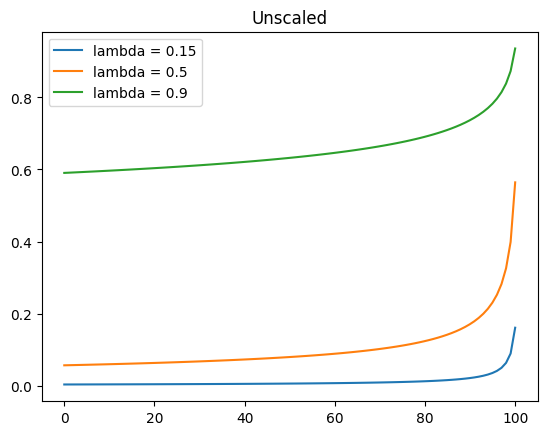

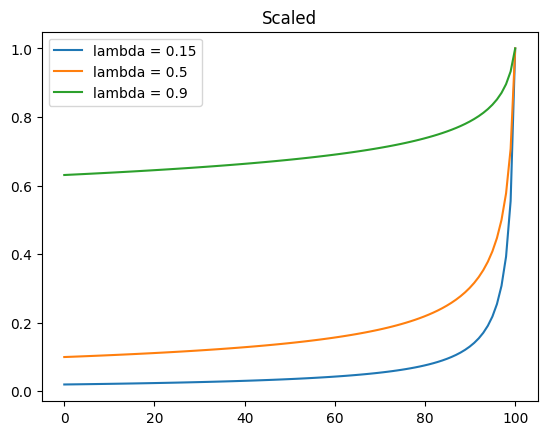

In [19]:
len_memory = 100

_lambdas = [0.15, 0.5, 0.9]

for _lambda in _lambdas:

    y =  [ ( 1 / gamma(_lambda) ) *  1 / ((len_memory-n) ** (1-_lambda)) for n in range(len_memory) ]  
    x = np.linspace(0, len_memory, len_memory)

    plt.plot(x, y, label = f"lambda = {_lambda}")
    plt.legend()
    plt.title("Unscaled")
plt.show()


for _lambda in _lambdas:

    y =  [ ( 1 / gamma(_lambda) ) *  1 / ((len_memory-n) ** (1-_lambda)) for n in range(len_memory) ]  
    y = y / max(y)
    x = np.linspace(0, len_memory, len_memory)
    plt.title("Scaled")

    plt.plot(x, y, label = f"lambda = {_lambda}")
    plt.legend()
plt.show()

In [36]:
def f_global(x1, x2):
    return 0.05 * x1**2 + 0.05 * x2**2


def get_fod( x, f, _lambda= 0.5, len_memory= 10, n_bins=10):
    """
    Parameters:
    -----------

    _lambda = float
        The order you desire on your fractional derivative. Order of 1 corresponds to a first derivative.
    f = array shape (len_memory,)
        Interval on which to take the fractional derivative.
    n_bins = int
        Number of bins used to approximate the integral.


    Returns:
    --------

    The fractional derivative at point x.

        if first_derivative(x) < 0:
            we take interval (x - len_memory, x) into consideration.
        
        if first_derivative(x) > 0:
            we take interval (x, x + len_memory) into consideration.
        


    """

    print("x = ", x)

    x_first_derivative = gradient_vector_f_global_Autograd(x)

    print("x_first derivative= ", x_first_derivative)

    if x_first_derivative[0] < 0:
        fod_x1 = ( 1 / gamma(_lambda) ) * sum( [ f(n, x2) / ((x1 - n) ** (1-_lambda)) for n in np.linspace(x1 - len_memory, x1, num= n_bins) ] )
    if x_first_derivative[0] > 0:
        fod_x1 = ( 1 / gamma(_lambda) ) * sum( [ f(x1, n) / ((n - x1 + len_memory) ** (1-_lambda)) for n in np.linspace(x1, x1 + len_memory, num= n_bins) ] )

    if x_first_derivative[1] > 0:
        fod_x2 = ( 1 / gamma(_lambda) ) * sum( [ f(n, x2) / ((x1 - n) ** (1-_lambda)) for n in np.linspace(x2 - len_memory, x2, num= n_bins) ] )
    if x_first_derivative[1] < 0:
        fod_x2 = ( 1 / gamma(_lambda) ) * sum( [ f(x1, n) / ((n - x1 + len_memory) ** (1-_lambda)) for n in np.linspace(x2, x2 + len_memory, num= n_bins) ] )

    if x_first_derivative[0] == 0:
        fod_x1 = 0

    if x_first_derivative[1] == 0:
        fod_x2 = 0

    return fod_x1, fod_x2

x =  [1.0, -1.0]
x_first derivative=  (Array(0.1, dtype=float32, weak_type=True), Array(-0.1, dtype=float32, weak_type=True))
x =  [0.9680335507972897, -1.0193147734632417]
x_first derivative=  (Array(0.09680336, dtype=float32), Array(-0.10193148, dtype=float32))
x =  [0.9363807686750258, -1.0384604577202625]
x_first derivative=  (Array(0.09363808, dtype=float32), Array(-0.10384605, dtype=float32))
x =  [0.9050355893896409, -1.0574409628271493]
x_first derivative=  (Array(0.09050357, dtype=float32), Array(-0.1057441, dtype=float32))
x =  [0.8739920951268676, -1.0762600948522596]
x_first derivative=  (Array(0.08739921, dtype=float32), Array(-0.10762601, dtype=float32))
x =  [0.8432445100043705, -1.0949215593752868]
x_first derivative=  (Array(0.08432445, dtype=float32), Array(-0.10949216, dtype=float32))
x =  [0.8127871957381838, -1.113428964849142]
x_first derivative=  (Array(0.08127872, dtype=float32), Array(-0.1113429, dtype=float32))
x =  [0.7826146474660154, -1.1317858258308608]
x_

/tmp/ipykernel_6716/2767346416.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  fod_x1 = ( 1 / gamma(_lambda) ) * sum( [ f(n, x2) / ((x1 - n) ** (1-_lambda)) for n in np.linspace(x1 - len_memory, x1, num= n_bins) ] )
/home/andrei/.local/lib/python3.10/site-packages/numpy/core/function_base.py:139: RuntimeWarning: invalid value encountered in scalar subtract
  delta = stop - start
/tmp/ipykernel_6716/2767346416.py:40: RuntimeWarning: invalid value encountered in scalar subtract
  fod_x1 = ( 1 / gamma(_lambda) ) * sum( [ f(n, x2) / ((x1 - n) ** (1-_lambda)) for n in np.linspace(x1 - len_memory, x1, num= n_bins) ] )
/tmp/ipykernel_6716/2767346416.py:47: RuntimeWarning: invalid value encountered in scalar divide
  fod_x2 = ( 1 / gamma(_lambda) ) * sum( [ f(x1, n) / ((n - x1 + len_memory) ** (1-_lambda)) for n in np.linspace(x2, x2 + len_memory, num= n_bins) ] )


UnboundLocalError: local variable 'fod_x1' referenced before assignment

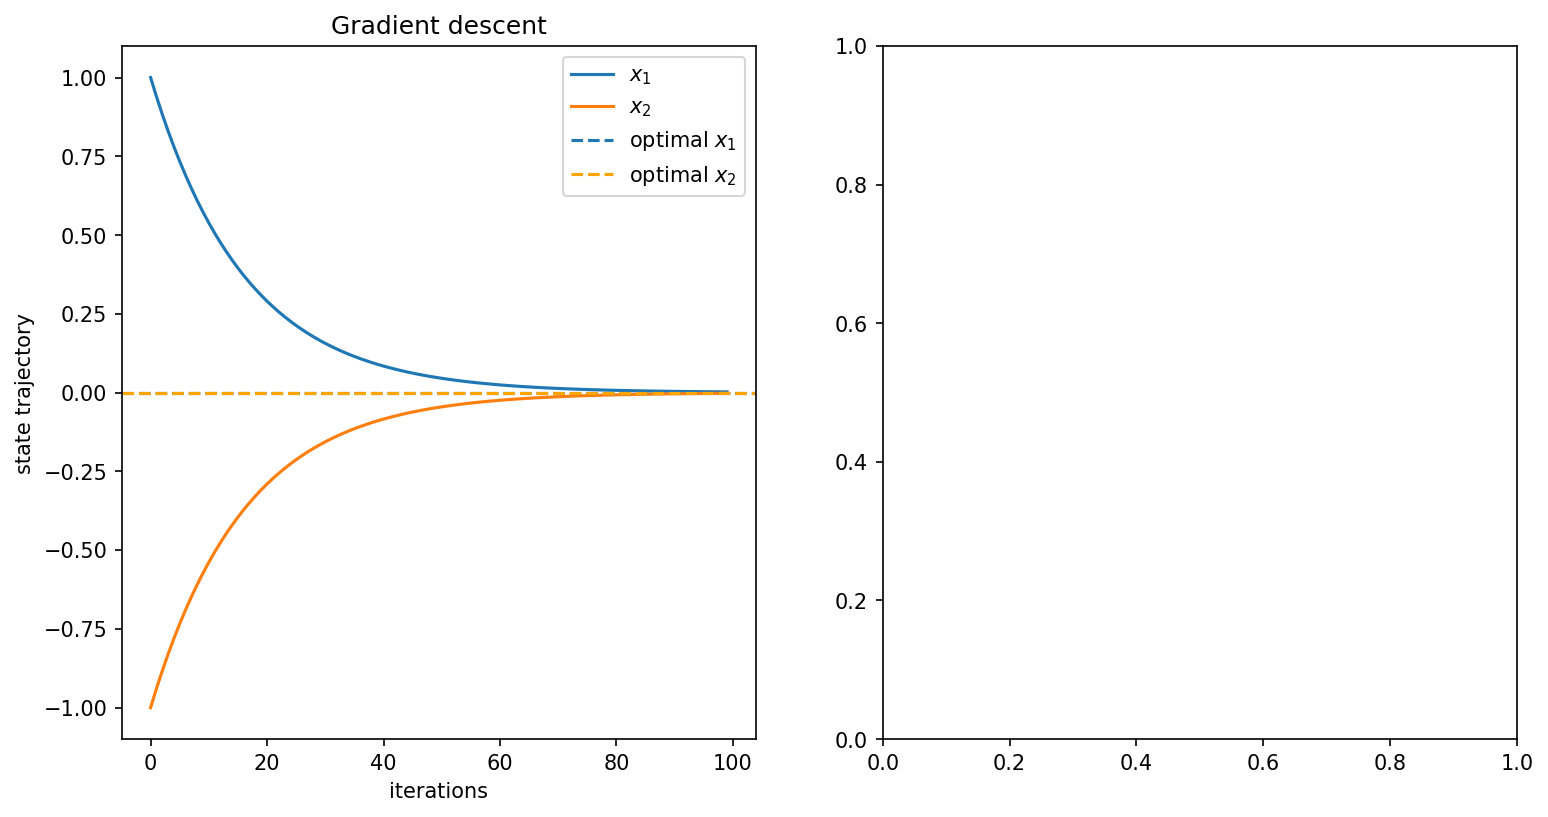

In [37]:
import matplotlib.pyplot as plt

def gradient_vector_f_global_Autograd(x):
    import jax

    x1, x2 = x[0], x[1]

    f_partial_x1 = jax.grad(f_global, argnums=0)
    f_partial_x2 = jax.grad(f_global, argnums=1)

    return f_partial_x1(x1, x2), f_partial_x2(x1, x2)

def f_global(x1, x2):
    return 0.05 * x1**2 + 0.05 * x2**2

optimal_x_1 = 0
optimal_x_2 = 0

n_iterations = 100

beta = 0.2
alpha = 3

learning_rate = beta * alpha

x1, x2 = 1., -1.

history_x1 = []
history_x2 = []
for _ in range(n_iterations):
    history_x1.append(x1)
    history_x2.append(x2)

    x1 = x1 - learning_rate * gradient_vector_f_global_Autograd([x1, x2])[0]
    x2 = x2 - learning_rate * gradient_vector_f_global_Autograd([x1, x2])[1]

fig, axs = plt.subplots(1, 2, figsize=(12, 6), dpi=150)

# Plot for the first scenario
axs[0].plot(range(len(history_x1)), history_x1, label="$x_1$")
axs[0].plot(range(len(history_x2)), history_x2, label="$x_2$")
axs[0].axhline(y=optimal_x_1, linestyle='dashed', label="optimal $x_1$")
axs[0].axhline(y=optimal_x_2, linestyle='dashed', label="optimal $x_2$", color="orange")
axs[0].set_title("Gradient descent")
axs[0].set_xlabel("iterations")
axs[0].set_ylabel("state trajectory")
axs[0].legend()

# Plot for the second scenario


betas = [0.01, 0.05, 0.1, 0.2]

for beta in betas:
    x1, x2 = 1., -1.
    history_x1 = []
    history_x2 = []
    # beta = 0.1
    len_memory = 10
    gradient_memory_x1 = len_memory * [0]
    gradient_memory_x2 = len_memory * [0]

    for _ in range(n_iterations):
        history_x1.append(x1)
        history_x2.append(x2)

        # gradient_memory_x1[:-1], gradient_memory_x2[:-1] = gradient_memory_x1[1:], gradient_memory_x2[1:]
        # gradient_memory_x1[-1] = float(gradient_vector_f_global_Autograd([x1, x2])[0])
        # gradient_memory_x2[-1] = float(gradient_vector_f_global_Autograd([x1, x2])[1])

        x = [x1, x2]
        x_fod = get_fod(x, f_global, _lambda= 0.5, len_memory= 10)

        x1 = x1 - beta * x_fod[0]
        x2 = x2 - beta * x_fod[1]
        
    axs[1].plot(range(len(history_x1)), history_x1, label=f"$x_1$, beta = {beta}")
    axs[1].plot(range(len(history_x2)), history_x2, label="$x_2$")
axs[1].axhline(y=optimal_x_1, linestyle='dashed', label="optimal $x_1$, $x_2$")

fig.suptitle("Parameter Updates - Centralized Optimization", y=1.02)

axs[1].set_title("Gradient descent + gradient memory (PI controlled)")
axs[1].set_xlabel("iterations")
axs[1].set_ylabel("state trajectory")
axs[1].legend()
plt.show()